# RawDataset

In [1]:
from repalette.utils.data import RawDataset

In [2]:
raw_dataset = RawDataset()

In [3]:
(image, palette), raw_image = raw_dataset[0]

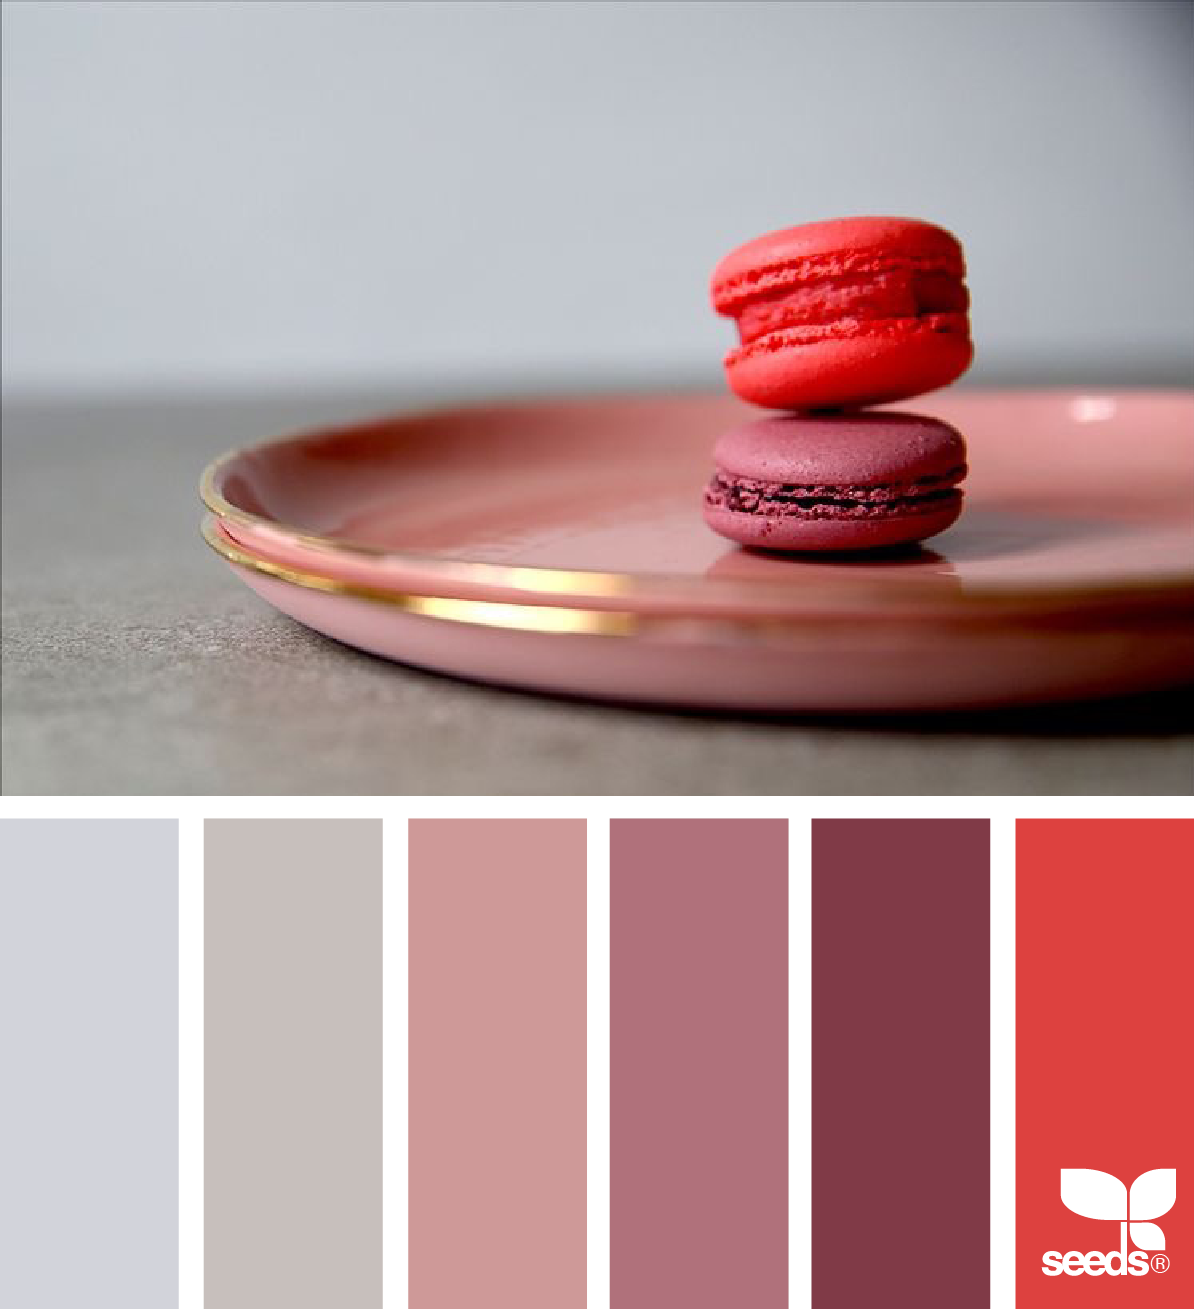

In [4]:
image

In [5]:
palette

['#DC413E', '#803A48', '#AF717B', '#CE9998', '#C7BFBC', '#D2D2DA']

In [6]:
raw_image.name

'5_3_ColorServe_sindstudio.png'

In [7]:
raw_image.path

'/home/dan/Projects/repalette/data/raw/5_3_ColorServe_sindstudio.png'

In [8]:
raw_image.url

'https://www.design-seeds.com/wp-content/uploads/2017/05/5_3_ColorServe_sindstudio.png'

In [9]:
raw_image.height

1309

In [10]:
raw_image.width

1194

In [11]:
raw_image.created_at

datetime.datetime(2020, 11, 9, 20, 15, 12, 763406)

In [12]:
len(raw_dataset)

2999

# RGBDataset

In [13]:
from repalette.utils.data import RGBDataset

In [14]:
rgb_dataset = RGBDataset()

In [15]:
(image, palette), rgb_image = rgb_dataset[0]

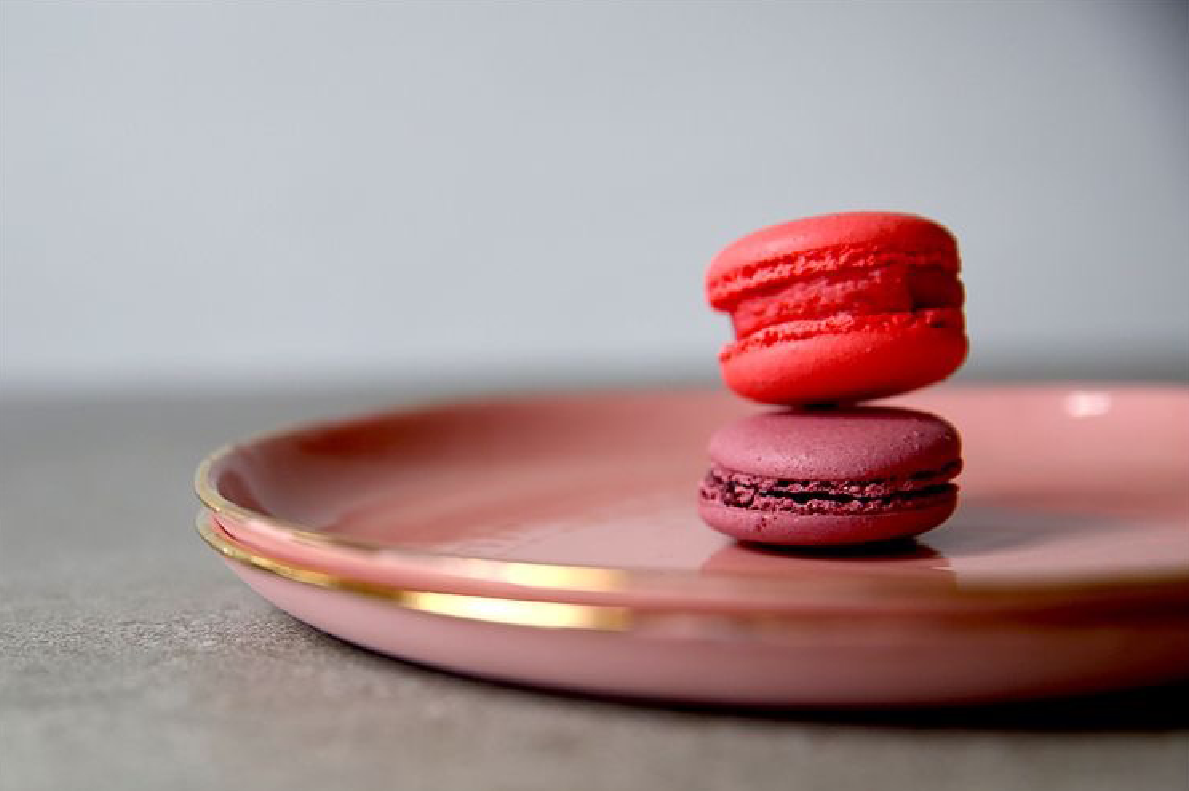

In [16]:
image

In [18]:
rgb_image.palette

array([[[210, 210, 218],
        [199, 191, 188],
        [206, 153, 152],
        [175, 113, 123],
        [128,  58,  72],
        [220,  65,  62]]])

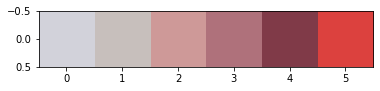

In [19]:
from matplotlib import pyplot as plt

plt.imshow(rgb_image.palette)

In [27]:
rgb_image.name

'5_3_ColorServe_sindstudio.png'

In [21]:
rgb_image.path

'/home/dan/Projects/repalette/data/raw/5_3_ColorServe_sindstudio.png'

In [22]:
rgb_image.url

'https://www.design-seeds.com/wp-content/uploads/2017/05/5_3_ColorServe_sindstudio.png'

In [23]:
rgb_image.height

1309

In [24]:
rgb_image.width

1194

In [28]:
rgb_image.created_at

datetime.datetime(2020, 11, 10, 19, 22, 59, 645842)

In [26]:
len(rgb_dataset)

2994

In [18]:
from tqdm import tqdm

for i, _ in tqdm(enumerate(raw_dataset)):
    pass

2999it [01:16, 39.33it/s]


In [20]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

from repalette.utils.models import RGBImage, RawImage
from repalette.constants import DATABASE_PATH

In [21]:
engine = create_engine(f"sqlite:///{DATABASE_PATH}")
    # create a configured "Session" class
Session = sessionmaker(bind=engine)

In [27]:
raw_dataset[2998]

((<PIL.Image.Image image mode=RGB size=1100x1004 at 0x7F9F1FC481C0>,
  ['#291825', '#634e69', '#b89db1', '#c8cfc4', '#8eacba', '#595956']),
 <repalette.utils.models.raw_image.RawImage at 0x7f9f1fbc4580>)

In [39]:
len(raw_dataset)

2999

In [36]:
session = Session()
session.query(RGBImage).delete()
session.commit()

In [28]:
query.delete()

37